In [5]:
#import dependenceis
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [6]:
#view data sources
ILI_data_path = '../OriginalData/ILINet.csv'
clin_data_path = '../OriginalData/WHO_NREVSS_Clinical_Labs.csv'
#pub_data_path = 'FluViewPhase2Data (2)/WHO_NREVSS_Public_Health_Labs.csv'

#read data sources
ILI_data = pd.read_csv(ILI_data_path, skiprows = 1)
clin_data = pd.read_csv(clin_data_path)
#pub_data = pd.read_csv(pub_data_path)


In [54]:
#view ILI
ILI_df = pd.DataFrame(ILI_data)

#remove null values in full columns
ILI_drop = ILI_df.drop(columns = ['NUM. OF PROVIDERS', '% WEIGHTED ILI','AGE 0-4','AGE 25-49', 'AGE 25-64', 'AGE 5-24', 'AGE 50-64','AGE 65'])

#remove any rows that contain X
ILI_drop2 = ILI_drop[ILI_drop['%UNWEIGHTED ILI'] != 'X']
ILI_drop2 = ILI_drop[ILI_drop['ILITOTAL'] != 'X']
#ILI_drop2 = ILI-drop[ILI_drop['TOTAL PATIENTS'] != 'X']


#convert datatypes of columns to int
ILI_drop2 = ILI_drop2[['YEAR', 'WEEK', 'ILITOTAL', 'TOTAL PATIENTS']].astype(int)


#clean ILI
nxt_ILI = ILI_drop2

nxt_ILI.head(26)

,YEAR,WEEK,ILITOTAL,TOTAL PATIENTS
0,2016,40,169,7599
1,2016,40,14,1489
2,2016,40,309,25032
3,2016,40,40,4360
4,2016,40,668,53317
5,2016,40,22,2836
6,2016,40,64,5180
7,2016,40,3,2861
8,2016,40,160,2896
10,2016,40,903,55581


In [83]:
#clean weeks. . .
#Spring - starts the third week of March (month 3) --> March week 3 to June week 2 --> week 12 to week 24
#Summer - starts the third week of June (month 6) --> June week 3 to September week 2 --> week 25 to week 37
#Fall - starts the third week of September (month 9) --> September week 3 to December week 2 --> week 38 to week 50
#Winter - starts the third week of December (month 12) --> December week 3 to March week 2 --> week 51, 52, and week 1 to week 11

ILI_max = nxt_ILI['ILITOTAL'].sum()


In [75]:
weeks = nxt_ILI['WEEK']
season = []

for week in weeks:
    if week >= 51:
        season.append('WINTER')
    elif week >= 38:
        season.append('FALL')
    elif week >= 25:
        season.append('SUMMER')
    elif week >= 12:
        season.append('SPRING')
    elif week >=1:
        season.append('WINTER')
        
nxt_ILI['SEASON'] = season
    
nxt_ILI.head()

,YEAR,WEEK,ILITOTAL,TOTAL PATIENTS,SEASON
0,2016,40,169,7599,FALL
1,2016,40,14,1489,FALL
2,2016,40,309,25032,FALL
3,2016,40,40,4360,FALL
4,2016,40,668,53317,FALL


In [84]:
season_df = nxt_ILI.groupby(['SEASON']).sum()['ILITOTAL']
season_df.head()

SEASON
FALL      1114869
SPRING     939982
SUMMER     436001
WINTER    2925690
Name: ILITOTAL, dtype: int32

In [29]:
#ILI df to csv for merge
nxt_ILI.to_csv('ILI.csv',index=False)


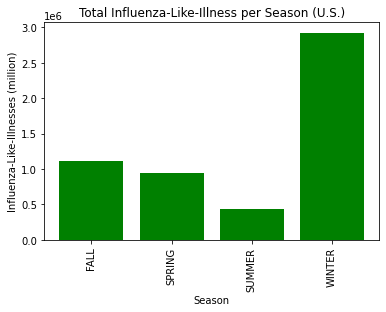

In [91]:
#ILI bar graph: x-axis = season (weeks), y-axis = num ILI

plt.bar(season_df.index.values, season_df.values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Influenza-Like-Illnesses (million)')
plt.title('Total Influenza-Like-Illness per Season (U.S.)')
plt.show()